In [3]:
import tensorflow as tf
import numpy 
import matplotlib.pyplot as plt

In [4]:
rng = numpy.random

In [5]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [6]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0] 

In [7]:
# tf Graph input
X = tf.placeholder('float')
Y = tf.placeholder('float')

# Set model weight
W = tf.Variable(rng.randn(), name='weiight')
b = tf.Variable(rng.randn(), name='bias')

In [8]:
pred = tf.add(tf.multiply(X, W), b)

In [9]:
cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2 * n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.164813250 W= 0.084328115 b= 1.9903744
Epoch: 0100 cost= 0.154691070 W= 0.09415742 b= 1.9196633
Epoch: 0150 cost= 0.145736769 W= 0.103401616 b= 1.853161
Epoch: 0200 cost= 0.137814984 W= 0.11209619 b= 1.7906128
Epoch: 0250 cost= 0.130806580 W= 0.12027388 b= 1.7317834
Epoch: 0300 cost= 0.124606401 W= 0.12796506 b= 1.6764534
Epoch: 0350 cost= 0.119121008 W= 0.13519903 b= 1.6244127
Epoch: 0400 cost= 0.114268132 W= 0.14200278 b= 1.5754671
Epoch: 0450 cost= 0.109974928 W= 0.14840157 b= 1.5294346
Epoch: 0500 cost= 0.106176823 W= 0.15441963 b= 1.4861417
Epoch: 0550 cost= 0.102816440 W= 0.1600799 b= 1.4454218
Epoch: 0600 cost= 0.099843249 W= 0.16540378 b= 1.407122
Epoch: 0650 cost= 0.097212858 W= 0.17041084 b= 1.3711013
Epoch: 0700 cost= 0.094885580 W= 0.17512026 b= 1.3372222
Epoch: 0750 cost= 0.092826441 W= 0.17954966 b= 1.3053572
Epoch: 0800 cost= 0.091004558 W= 0.18371579 b= 1.2753866
Epoch: 0850 cost= 0.089392520 W= 0.18763429 b= 1.2471973
Epoch: 0900 cost= 0.087966293 W=

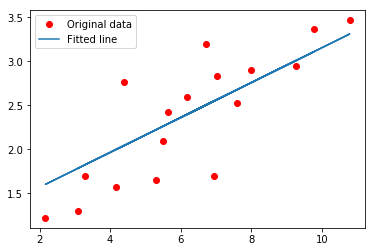

In [13]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),
                 "W=", sess.run(W), "b=", sess.run(b))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b))
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label="Fitted line")
    plt.legend()
    plt.show()